In [72]:
import pandas as pd

In [73]:
df = pd.read_csv('train.csv', index_col = 1)

In [74]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
df.shape

(891, 11)

In [124]:
survival = pd.DataFrame(df.index.value_counts())

In [125]:
survival.reset_index(inplace = True)


In [126]:
survival.rename(columns = {'index': 'State', 'Survived': 'Number of Passengers'}, inplace = True)

In [127]:
survival['State'].replace({0:'Non-Surv.', 1:'Surviving'}, inplace = True)

In [128]:
survival

,State,Number of Passengers
0,Non-Surv.,549
1,Surviving,342


In [129]:
survival.set_index('State', inplace = True)

In [130]:
survival

,Number of Passengers
State,
Non-Surv.,549
Surviving,342


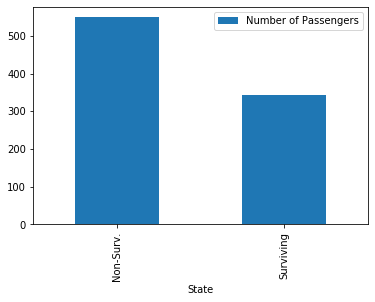

In [131]:
survival.plot.bar()

In [185]:
fcp = df[df['Pclass'] == 1]

In [186]:
fcp.shape[0]

216

In [187]:
fcps = fcp[fcp.index == 1]

In [188]:
proportion_first_class = (fcps.shape[0])/(fcp.shape[0])*100
proportion_first_class

62.96296296296296

In [219]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [220]:
df.reset_index(inplace= True)

In [232]:
class_sort = df.groupby(['Pclass', 'Sex']).count()

In [258]:
class_sort.head()

Survived  PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex                                                                    
1      female        94           94    94   85     94     94      94    94   
       male         122          122   122  101    122    122     122   122   
2      female        76           76    76   74     76     76      76    76   
       male         108          108   108   99    108    108     108   108   
3      female       144          144   144  102    144    144     144   144   

               Cabin  Embarked  
Pclass Sex                      
1      female     81        92  
       male       95       122  
2      female     10        76  
       male        6       108  
3      female      6       144

In [259]:
class_sort.stack()

Pclass  Sex                
1       female  Survived        94
                PassengerId     94
                Name            94
                Age             85
                SibSp           94
                Parch           94
                Ticket          94
                Fare            94
                Cabin           81
                Embarked        92
        male    Survived       122
                PassengerId    122
                Name           122
                Age            101
                SibSp          122
                Parch          122
                Ticket         122
                Fare           122
                Cabin           95
                Embarked       122
2       female  Survived        76
                PassengerId     76
                Name            76
                Age             74
                SibSp           76
                Parch           76
                Ticket          76
                Fare       

In [267]:
class_sort.head()

Survived  PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex                                                                    
1      female        94           94    94   85     94     94      94    94   
       male         122          122   122  101    122    122     122   122   
2      female        76           76    76   74     76     76      76    76   
       male         108          108   108   99    108    108     108   108   
3      female       144          144   144  102    144    144     144   144   

               Cabin  Embarked  
Pclass Sex                      
1      female     81        92  
       male       95       122  
2      female     10        76  
       male        6       108  
3      female      6       144

Survived           PassengerId           Name            Age  ...  \
Pclass        1    2    3           1    2    3    1    2    3    1  ...   
Sex                                                                  ...   
female       94   76  144          94   76  144   94   76  144   85  ...   
male        122  108  347         122  108  347  122  108  347  101  ...   

       Ticket Fare           Cabin        Embarked            
Pclass      3    1    2    3     1   2  3        1    2    3  
Sex                                                           
female    144   94   76  144    81  10  6       92   76  144  
male      347  122  108  347    95   6  6      122  108  347  

[2 rows x 30 columns]

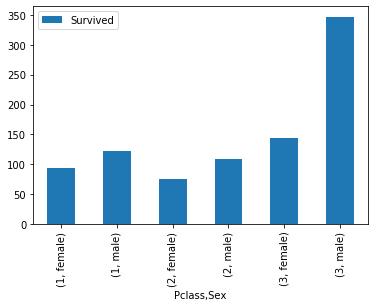

In [268]:
class_sort.plot.bar(y = ['Survived'])

Survived  PassengerId  \
Pclass Sex                             
1      male           1          446   
       female         1          311   
       female         1          310   
       female         1          308   
       female         1          307   

                                                            Name   Age  SibSp  \
Pclass Sex                                                                      
1      male                            Dodge, Master. Washington   4.0      0   
       female                     Hays, Miss. Margaret Bechstein  24.0      0   
       female                     Francatelli, Miss. Laura Mabel  30.0      0   
       female  Penasco y Castellana, Mrs. Victor de Satode (M...  17.0      1   
       female                            Fleming, Miss. Margaret   NaN      0   

               Parch    Ticket      Fare Cabin Embarked  
Pclass Sex                                               
1      male        2     33638   81.8583   A34        S  
       female      0     11767   83.1583   C54        C  
       female      0  PC 17485   56.9292   E36        C  
       female      0  PC 17758  108.9000   C65        C  
       female      0     17421  110.8833   NaN        C

In [269]:
df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [320]:
new_df = df[['Pclass','Age', 'Survived']]

In [321]:
new_df.head()

,Pclass,Age,Survived
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0


In [322]:
new_df.set_index('Survived', inplace = True)

In [323]:
new_df.head()

,Pclass,Age
Survived,,
0,3,22.0
1,1,38.0
1,3,26.0
1,1,35.0
0,3,35.0


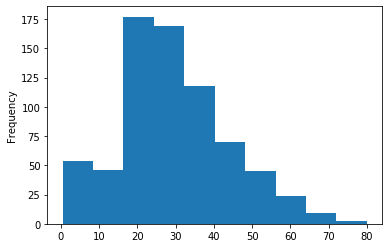

In [324]:
new_df['Age'].plot.hist()

In [291]:
from matplotlib import pyplot as plt

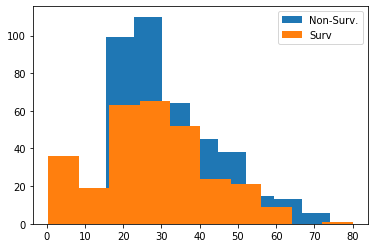

In [295]:
plt.hist(new_df.loc[0]['Age'], label = 'Non-Surv.')
plt.hist(new_df.loc[1]['Age'], label = 'Surv')
plt.legend()

In [296]:
df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [325]:
avg_age_gr = df.groupby('Survived').mean()

In [326]:
avg_age_gr

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [327]:
drowned_age = avg_age_gr.loc[0]['Age']
surv_age = avg_age_gr.loc[1]['Age']

In [328]:
new_df.head(20)

,Pclass,Age
Survived,,
0,3,22.0
1,1,38.0
1,3,26.0
1,1,35.0
0,3,35.0
0,3,NaN
0,1,54.0
0,3,2.0
1,3,27.0


In [330]:
df1 = new_df.loc[0].fillna(drowned_age) 

In [332]:
df1.head()

,Pclass,Age
Survived,,
0,3,22.000000
0,3,35.000000
0,3,30.626179
0,1,54.000000
0,3,2.000000


In [333]:
df2 = new_df.loc[1].fillna(surv_age)

In [336]:
dafr = pd.concat([df1, df2])

In [337]:
dafr

,Pclass,Age
Survived,,
0,3,22.000000
0,3,35.000000
0,3,30.626179
0,1,54.000000
0,3,2.000000
0,3,20.000000
0,3,39.000000
0,3,14.000000
0,3,2.000000
